In [3]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import json
from nltk.translate.bleu_score import sentence_bleu
import pandas as pd
import json

In [4]:
# input images
# in this case rendered images
# use absolute path
input_path = '/home/anelise/lab/md_saliency_repo/applications/render_results/'
infos_path = "/home/anelise/lab/md_saliency_repo/applications/captions_topdown_infos.pkl"
model_path = "/home/anelise/lab/md_saliency_repo/applications/captions_topdown_model_best.pth"

time_points = [0, 500, 3000, 5000]

In [5]:
all_img = [f for f in sorted(os.listdir(input_path)) if (f.endswith('.jpg') or f.endswith('.png') and not f.startswith('.'))]
img2idx = {f:i for i,f in enumerate(all_img)}
img_sets = list(set(['_'.join(f.split('_')[1:]) for f in all_img]))

In [39]:
# follow the instructions on https://github.com/mzhangyb/self-critical.pytorch#generate-image-captions
# for downloading models and COCO captions
!cd self-critical.pytorch/; python eval.py --model {model_path} --infos_path {infos_path} --image_folder {input_path} --num_images -1 --beam_size=5

DataLoaderRaw loading images from folder:  /home/anelise/lab/md_saliency_repo/applications/render_results/
0
listing all images in directory /home/anelise/lab/md_saliency_repo/applications/render_results/
DataLoaderRaw found  2148  images
/home/anelise/miniconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
a man is holding a frisbee in his hand
a man holding a frisbee in his hand
a man is holding a frisbee in the street
a man is holding a skateboard in his hand
a man is holding a cell phone in a hand
--------------------
a group of people standing on a tennis court
a group of people playing with a frisbee in a gym
a group of people standing in a beach with a bird
a group of people playing with a dog in a gym
a group of people standing in a tennis court
--------------------
a group of people sitting on a beach
a gro

image 17: a group of sail boats are sitting in the water
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_CAT2000Actions_091.jpg" vis/imgs/img18.jpg
image 18: a man riding a snowboard on a snow covered slope
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_CAT2000Actions_099.jpg" vis/imgs/img19.jpg
image 19: a woman is standing on skis in the snow
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_CAT2000Actions_107.jpg" vis/imgs/img20.jpg
image 20: a woman is standing next to a horse
evaluating validation preformance... 19/2148 (0.000000)
a man is standing in front of a bike with a
a man is standing in front of a bicycle
a man is standing next to a bike with a bicycle
a man is standing in front of a bike
a man is standing next to a bike
--------------------
a group of people walking in a park with a frisbee
a group of people walking in a building
a group of people walking in a field with a frisbee
a group of people walking in a

image 35: a man and a woman playing with a baseball bat
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_CAT2000Actions_177.jpg" vis/imgs/img36.jpg
image 36: a woman sitting on a couch in a living room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_CAT2000Actions_193.jpg" vis/imgs/img37.jpg
image 37: a group of people taking a picture of a cell phone
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_CAT2000Actions_195.jpg" vis/imgs/img38.jpg
image 38: a man taking a picture of a mirror in a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000004694.jpg" vis/imgs/img39.jpg
image 39: a pile of books sitting on top of a bed
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000005508.jpg" vis/imgs/img40.jpg
image 40: a group of children sitting in a room playing a video game
evaluating validation preformance... 39/2148 (0.000000)
a man riding a moto

image 54: a group of young boys playing soccer on a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000034104.jpg" vis/imgs/img55.jpg
image 55: a plate of food with a salad on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000037039.jpg" vis/imgs/img56.jpg
image 56: a woman sitting at a table with a cake
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000037169.jpg" vis/imgs/img57.jpg
image 57: a red bus driving down a city street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000041138.jpg" vis/imgs/img58.jpg
image 58: a group of people standing next to a train station
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000046149.jpg" vis/imgs/img59.jpg
image 59: a group of people riding on the back of horses
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO

image 71: a group of people standing in a market with vegetables
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000066862.jpg" vis/imgs/img72.jpg
image 72: a man holding a tennis ball on a tennis court
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000067155.jpg" vis/imgs/img73.jpg
image 73: a wooden table with a bowl of food on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000068788.jpg" vis/imgs/img74.jpg
image 74: a woman standing in front of a bunch of oranges
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000070104.jpg" vis/imgs/img75.jpg
image 75: a red and white bus driving down a city street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000072133.jpg" vis/imgs/img76.jpg
image 76: a yellow fire hydrant on the side of a street
cp "/home/anelise/lab/md_saliency_repo/applicat

a man riding a skateboard in a parking lot
a young boy riding a skateboard in a parking lot
a young boy riding a skateboard in a street
a man riding a skateboard in a street
a group of people riding skateboards on a street
--------------------
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000096745.jpg" vis/imgs/img91.jpg
image 91: a man is standing next to a horse in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000098601.jpg" vis/imgs/img92.jpg
image 92: a boat is sitting in the water
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000100717.jpg" vis/imgs/img93.jpg
image 93: a person is sitting on a table with a box of donuts
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000102766.jpg" vis/imgs/img94.jpg
image 94: a man and a woman sitting at a table with a pizza
cp "/home/anelise/lab/md_saliency_repo/applications/re

image 111: a man sitting at a table with a laptop computer
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000137824.jpg" vis/imgs/img112.jpg
image 112: a group of people riding on the back of an elephant
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000139865.jpg" vis/imgs/img113.jpg
image 113: a sandwich on a plate with a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000143965.jpg" vis/imgs/img114.jpg
image 114: a living room with a couch and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000146324.jpg" vis/imgs/img115.jpg
image 115: a man riding a motorcycle on a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000146481.jpg" vis/imgs/img116.jpg
image 116: a little girl laying in a chair in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_C

image 131: a plane sitting on top of a dock
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000187724.jpg" vis/imgs/img132.jpg
image 132: a kitchen stove with a stove and a counter
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000189735.jpg" vis/imgs/img133.jpg
image 133: a street sign on the side of a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000191325.jpg" vis/imgs/img134.jpg
image 134: a traffic light on a city street with cars
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000192104.jpg" vis/imgs/img135.jpg
image 135: a group of horses standing on a field with horses
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000192931.jpg" vis/imgs/img136.jpg
image 136: a living room with a couch and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_tr

image 151: a pizza sitting on top of a stove
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000211622.jpg" vis/imgs/img152.jpg
image 152: a man and a woman holding a glass of wine
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000213117.jpg" vis/imgs/img153.jpg
image 153: a baseball player holding a bat on a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000213135.jpg" vis/imgs/img154.jpg
image 154: a young boy sitting on a table eating a piece of food
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000215994.jpg" vis/imgs/img155.jpg
image 155: a group of people sitting at a table in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000216716.jpg" vis/imgs/img156.jpg
image 156: a living room with a couch and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_result

image 171: a piece of chocolate cake on a plate with a fork
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000245451.jpg" vis/imgs/img172.jpg
image 172: a computer keyboard sitting on top of a desk
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000245857.jpg" vis/imgs/img173.jpg
image 173: a kitchen with a stove and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000247071.jpg" vis/imgs/img174.jpg
image 174: a herd of cows walking down a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000250400.jpg" vis/imgs/img175.jpg
image 175: a woman sitting on a couch in a living room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000254585.jpg" vis/imgs/img176.jpg
image 176: a group of people standing on skis in the snow
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/

image 191: a kitchen with a stove and a microwave
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000277263.jpg" vis/imgs/img192.jpg
image 192: a sign on the side of a city street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000278548.jpg" vis/imgs/img193.jpg
image 193: a blue car parked on the side of a tree
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000279322.jpg" vis/imgs/img194.jpg
image 194: a black and white cat sitting on top of a computer keyboard
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000284259.jpg" vis/imgs/img195.jpg
image 195: a plate of food with meat and broccoli on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000284644.jpg" vis/imgs/img196.jpg
image 196: a black dog laying on top of a bed with a
cp "/home/anelise/lab/md_saliency_repo/applications/rende

image 211: a man is standing in a kitchen
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000330177.jpg" vis/imgs/img212.jpg
image 212: a man doing a trick on a fire hydrant
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000332316.jpg" vis/imgs/img213.jpg
image 213: a group of people flying a kite in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000332836.jpg" vis/imgs/img214.jpg
image 214: a group of people sitting at a table with laptops
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000335500.jpg" vis/imgs/img215.jpg
image 215: a woman sitting at a table eating a hot dog
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000336503.jpg" vis/imgs/img216.jpg
image 216: a group of people standing in front of a brick wall
cp "/home/anelise/lab/md_saliency_repo/applications/render_results

image 231: a group of tables with umbrellas on a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000378907.jpg" vis/imgs/img232.jpg
image 232: a little girl is holding a cake in a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000379067.jpg" vis/imgs/img233.jpg
image 233: a kitchen with a table and chairs in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000379129.jpg" vis/imgs/img234.jpg
image 234: a living room with a couch and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000384700.jpg" vis/imgs/img235.jpg
image 235: a group of airplanes parked on top of an airport tarmac
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000385492.jpg" vis/imgs/img236.jpg
image 236: a desk with a computer sitting on top of it
cp "/home/anelise/lab/md_saliency_repo/applications/r

image 251: a group of benches sitting next to a tree
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000412681.jpg" vis/imgs/img252.jpg
image 252: a man sitting on a chair with a cat
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000416644.jpg" vis/imgs/img253.jpg
image 253: a laptop computer sitting on top of a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000417264.jpg" vis/imgs/img254.jpg
image 254: a couple of people standing on skis in the snow
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000417802.jpg" vis/imgs/img255.jpg
image 255: a black cat sitting on top of a computer desk
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000419644.jpg" vis/imgs/img256.jpg
image 256: a man cutting a pizza on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_t

image 271: a group of people standing on a beach flying a kite
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000450914.jpg" vis/imgs/img272.jpg
image 272: a bowl of fruit and oranges on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000451836.jpg" vis/imgs/img273.jpg
image 273: a bathroom with a bath tub and a shower
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000451969.jpg" vis/imgs/img274.jpg
image 274: a baseball player holding a bat on a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000453972.jpg" vis/imgs/img275.jpg
image 275: a living room with a couch and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000455856.jpg" vis/imgs/img276.jpg
image 276: a man in a suit and tie standing in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/

cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000483996.jpg" vis/imgs/img291.jpg
image 291: a hot dog on a plate with a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000486123.jpg" vis/imgs/img292.jpg
image 292: a couple of traffic lights on a city street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000487840.jpg" vis/imgs/img293.jpg
image 293: a young boy is sitting on a bike with a bicycle
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000491492.jpg" vis/imgs/img294.jpg
image 294: a large airplane parked on top of an airport tarmac
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000492131.jpg" vis/imgs/img295.jpg
image 295: a man riding a bike in the grass in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000492178.jpg" vis/imgs/im

image 311: a group of people sitting around a table with laptops
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000509915.jpg" vis/imgs/img312.jpg
image 312: a man talking on a cell phone in a car
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000511343.jpg" vis/imgs/img313.jpg
image 313: a bunch of cakes sitting in a display case
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000513708.jpg" vis/imgs/img314.jpg
image 314: a living room with a couch and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000514006.jpg" vis/imgs/img315.jpg
image 315: a pink bus is driving down a city street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000514781.jpg" vis/imgs/img316.jpg
image 316: a plate of food with a sandwich and french fries
cp "/home/anelise/lab/md_saliency_repo/applications/render_

image 331: a traffic light on a city street with cars
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000547618.jpg" vis/imgs/img332.jpg
image 332: a kitchen counter with a bunch of items on a counter
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000552163.jpg" vis/imgs/img333.jpg
image 333: a group of children standing in front of a group of children
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000552623.jpg" vis/imgs/img334.jpg
image 334: a man playing a video game with a wii
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000553149.jpg" vis/imgs/img335.jpg
image 335: a blue vase with flowers in it on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_COCO_train2014_000000554066.jpg" vis/imgs/img336.jpg
image 336: a kitchen with a sink and a table
cp "/home/anelise/lab/md_saliency_repo/applications/r

image 351: a group of people sitting on a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_013.jpg" vis/imgs/img352.jpg
image 352: a man and a woman sitting on a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_021.jpg" vis/imgs/img353.jpg
image 353: a group of people sitting on a chair
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_030.jpg" vis/imgs/img354.jpg
image 354: a group of people standing in a field with a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_044.jpg" vis/imgs/img355.jpg
image 355: a group of men sitting at a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_045.jpg" vis/imgs/img356.jpg
image 356: a group of people sitting at a table with a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_050.jpg" vis/imgs/img357.jpg
image 357: a group of people standing in a street
cp "/home/anelise/lab/md_s

image 371: a group of people walking down a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_138.jpg" vis/imgs/img372.jpg
image 372: a group of people standing next to a boat
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_140.jpg" vis/imgs/img373.jpg
image 373: a group of people standing in a field with a frisbee
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_143.jpg" vis/imgs/img374.jpg
image 374: a crowd of people walking in the street with umbrellas
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_145.jpg" vis/imgs/img375.jpg
image 375: a group of people standing in a street with a skateboard
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_147.jpg" vis/imgs/img376.jpg
image 376: a group of people sitting around a table eating food
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_151.jpg" vis/imgs/img377.jpg
image 377:

image 391: a group of people sitting at a table with a laptop
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_226.jpg" vis/imgs/img392.jpg
image 392: a woman is standing next to a table with a cake
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_228.jpg" vis/imgs/img393.jpg
image 393: a group of people standing in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_232.jpg" vis/imgs/img394.jpg
image 394: a group of people sitting at a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_253.jpg" vis/imgs/img395.jpg
image 395: a group of men standing next to a pair of scissors
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_262.jpg" vis/imgs/img396.jpg
image 396: a group of people standing in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_263.jpg" vis/imgs/img397.jpg
image 397: a group of people standing around a b

image 411: a group of people standing in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_341.jpg" vis/imgs/img412.jpg
image 412: a group of people standing in a field with a frisbee
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_344.jpg" vis/imgs/img413.jpg
image 413: a group of men sitting at a table with a cell phone
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_346.jpg" vis/imgs/img414.jpg
image 414: a man is holding a baseball bat in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_347.jpg" vis/imgs/img415.jpg
image 415: a crowd of people standing next to a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_350.jpg" vis/imgs/img416.jpg
image 416: a group of people walking down a street with a cell phone
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_352.jpg" vis/imgs/img417.jpg
image 417: a group of peo

image 431: a group of people walking down a dirt road
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_432.jpg" vis/imgs/img432.jpg
image 432: a group of people standing in a park with people
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_440.jpg" vis/imgs/img433.jpg
image 433: a group of men standing in front of a room with a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_441.jpg" vis/imgs/img434.jpg
image 434: a group of people standing around a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_448.jpg" vis/imgs/img435.jpg
image 435: a group of people sitting at a table with a cake
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_449.jpg" vis/imgs/img436.jpg
image 436: a group of people standing in front of a cell phone
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_Crowd_451.jpg" vis/imgs/img437.jpg
image 437: a group of peo

image 451: a woman is sitting on a bed in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_LaMem_00019621.jpg" vis/imgs/img452.jpg
image 452: a cup of coffee sitting on top of a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_LaMem_00022981.jpg" vis/imgs/img453.jpg
image 453: a woman is talking on a cell phone
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_LaMem_00024255.jpg" vis/imgs/img454.jpg
image 454: a man is standing in front of a truck
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_LaMem_00031962.jpg" vis/imgs/img455.jpg
image 455: a group of people standing in the snow
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_LaMem_00037287.jpg" vis/imgs/img456.jpg
image 456: a group of men standing in a airport with luggage
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_LaMem_00042207.jpg" vis/imgs/img457.jpg
image 457: a bunch of hot dogs on a gr

image 471: a man holding a baseball bat in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_OOC_220082855_f4742df70c_z.jpg" vis/imgs/img472.jpg
image 472: a couch sitting on the side of a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_OOC_2286901594_5e8e9d2a55_z.jpg" vis/imgs/img473.jpg
image 473: a group of people standing in a building with motorcycles
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_OOC_2339797896_04fba82c58_b.jpg" vis/imgs/img474.jpg
image 474: a woman is riding a green cart with a green cart
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_OOC_238902979_489a978e59_b.jpg" vis/imgs/img475.jpg
image 475: a man is sitting on a motorcycle in a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_OOC_2465040022_8a95ee81b9_b.jpg" vis/imgs/img476.jpg
image 476: a group of people standing on a street with a bird
cp "/home/anelise/lab/md_saliency_repo/appl

image 491: a group of people riding a skateboard down a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_OOC_3773417194_8e423cab7c_b.jpg" vis/imgs/img492.jpg
image 492: a group of people sitting on a couch in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_OOC_3929911212_9fcb1fe260_b.jpg" vis/imgs/img493.jpg
image 493: a red truck is parked in a parking lot
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_OOC_3932877975_8c7448d080_b.jpg" vis/imgs/img494.jpg
image 494: a statue of a man standing next to a truck
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_OOC_3991671432_c7cefde49c_b.jpg" vis/imgs/img495.jpg
image 495: a statue of a man standing in front of a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_OOC_3999663652_f12913be12_o.jpg" vis/imgs/img496.jpg
image 496: a living room with a couch and a table
cp "/home/anelise/lab/md_saliency_repo/applications/re

image 511: a busy city street with cars and a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_OOC_567426052_607a5c49da_b.jpg" vis/imgs/img512.jpg
image 512: a man is walking down a street with a cart
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_OOC_5849232585_9a7d867c2e_b.jpg" vis/imgs/img513.jpg
image 513: a man doing a trick on a skateboard in the air
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_OOC_6131087511_d625c9b80f_b.jpg" vis/imgs/img514.jpg
image 514: a man is standing in a car with a car
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_OOC_6137480169_67e0e7ab9a_b.jpg" vis/imgs/img515.jpg
image 515: a blue truck is parked in a parking lot with a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_OOC_84636829_d9cba4aa13_b.jpg" vis/imgs/img516.jpg
image 516: a bed sitting on the side of a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_O

image 531: a little girl sitting on a couch with a cat
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_StanfordWritingActions_writing_on_a_book_043.jpg" vis/imgs/img532.jpg
image 532: a man is holding a hot dog in a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_StanfordWritingActions_writing_on_a_book_067.jpg" vis/imgs/img533.jpg
image 533: a man sitting at a table with a laptop
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_StanfordWritingActions_writing_on_a_book_119.jpg" vis/imgs/img534.jpg
image 534: a man is cutting a pair of scissors on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_StanfordWritingActions_writing_on_a_book_135.jpg" vis/imgs/img535.jpg
image 535: a young boy is sitting at a table with a blender
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/0_StanfordWritingActions_writing_on_a_book_195.jpg" vis/imgs/img536.jpg
image 536: a man sitting at a tab

image 551: a group of people sitting on a boat in the water
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_075.jpg" vis/imgs/img552.jpg
image 552: a sail boat is sitting in the water
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_079.jpg" vis/imgs/img553.jpg
image 553: a sail boat sitting in the water
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_081.jpg" vis/imgs/img554.jpg
image 554: a group of sail boats are sitting in the water
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_091.jpg" vis/imgs/img555.jpg
image 555: a man riding a snowboard on a beach
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_099.jpg" vis/imgs/img556.jpg
image 556: a woman is standing on a snowboard in the snow
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_107.jpg" vis/imgs/i

image 571: a group of people standing in a field playing with a frisbee
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_159.jpg" vis/imgs/img572.jpg
image 572: a woman is standing next to a child in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_177.jpg" vis/imgs/img573.jpg
image 573: a woman sitting on a couch in a living room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_193.jpg" vis/imgs/img574.jpg
image 574: a group of people taking a picture of a cell phone
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_CAT2000Actions_195.jpg" vis/imgs/img575.jpg
image 575: a man taking a picture of himself in a mirror
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000004694.jpg" vis/imgs/img576.jpg
image 576: a bedroom with a bed with books on it
cp "/home/anelise/lab/md_saliency_repo/applications/render

image 591: a group of young boys playing soccer on a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000034104.jpg" vis/imgs/img592.jpg
image 592: a plate of food with a salad on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000037039.jpg" vis/imgs/img593.jpg
image 593: a woman sitting at a table with a cake
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000037169.jpg" vis/imgs/img594.jpg
image 594: a red bus driving down a city street at night
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000041138.jpg" vis/imgs/img595.jpg
image 595: a group of people standing next to a train station
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000046149.jpg" vis/imgs/img596.jpg
image 596: a group of people riding on the back of horses
cp "/home/anelise/lab/md_saliency_repo

image 611: a bunch of oranges sitting on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000070104.jpg" vis/imgs/img612.jpg
image 612: a red and white bus is driving down a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000072133.jpg" vis/imgs/img613.jpg
image 613: a yellow fire hydrant on the side of a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000073413.jpg" vis/imgs/img614.jpg
image 614: a couple of red double decker buses parked in a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000075362.jpg" vis/imgs/img615.jpg
image 615: a group of cakes on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000075621.jpg" vis/imgs/img616.jpg
image 616: a group of people standing in front of a bus
cp "/home/anelise/lab/md_saliency_repo/applications/

image 631: a man sitting at a table with a pizza
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000106799.jpg" vis/imgs/img632.jpg
image 632: a red truck is parked in a lot
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000110404.jpg" vis/imgs/img633.jpg
image 633: a group of women sitting at a table with a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000113315.jpg" vis/imgs/img634.jpg
image 634: a group of people preparing food on a kitchen
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000114978.jpg" vis/imgs/img635.jpg
image 635: a group of people standing on a snowboard on a snow covered slope
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000115967.jpg" vis/imgs/img636.jpg
image 636: a car driving down a city street at night
cp "/home/anelise/lab/md_saliency_repo/appl

image 651: a living room with a couch and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000146324.jpg" vis/imgs/img652.jpg
image 652: a man riding a motorcycle in the street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000146481.jpg" vis/imgs/img653.jpg
image 653: a baby laying in a chair in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000147012.jpg" vis/imgs/img654.jpg
image 654: a group of people standing in a field with a frisbee
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000148811.jpg" vis/imgs/img655.jpg
image 655: a group of people standing on a snow covered slope
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000156963.jpg" vis/imgs/img656.jpg
image 656: a red double decker bus driving down a street
cp "/home/anelise/lab/md_saliency_repo/applic

image 671: a highway with a traffic lights on a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000192104.jpg" vis/imgs/img672.jpg
image 672: a group of horses standing next to a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000192931.jpg" vis/imgs/img673.jpg
image 673: a living room with a couch and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000193193.jpg" vis/imgs/img674.jpg
image 674: a desk with a computer sitting on top of it
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000195352.jpg" vis/imgs/img675.jpg
image 675: a room with chairs and a desk with a computer
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000197705.jpg" vis/imgs/img676.jpg
image 676: a group of people riding bikes in a building
cp "/home/anelise/lab/md_saliency_repo/applicati

image 691: a young boy sitting on a chair eating a hot dog
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000215994.jpg" vis/imgs/img692.jpg
image 692: a crowd of people standing in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000216716.jpg" vis/imgs/img693.jpg
image 693: a living room with a couch and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000217238.jpg" vis/imgs/img694.jpg
image 694: a blender sitting on top of a counter
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000218142.jpg" vis/imgs/img695.jpg
image 695: a black cat standing on top of a kitchen sink
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000223129.jpg" vis/imgs/img696.jpg
image 696: a white bus is driving down a city street
cp "/home/anelise/lab/md_saliency_repo/applications/render_

image 711: a herd of cows walking down a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000250400.jpg" vis/imgs/img712.jpg
image 712: a woman sitting on a couch in a living room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000254585.jpg" vis/imgs/img713.jpg
image 713: a group of people standing on skis in the snow
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000256190.jpg" vis/imgs/img714.jpg
image 714: a group of people sitting at a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000256384.jpg" vis/imgs/img715.jpg
image 715: a living room with a television sitting on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000257063.jpg" vis/imgs/img716.jpg
image 716: a bedroom with a bed and a tv in a room
cp "/home/anelise/lab/md_saliency_repo/applications/r

image 731: a black and white cat sitting on top of a computer desk
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000284259.jpg" vis/imgs/img732.jpg
image 732: a plate of food with meat and broccoli on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000284644.jpg" vis/imgs/img733.jpg
image 733: a black and white dog sitting on top of a bed
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000286930.jpg" vis/imgs/img734.jpg
image 734: a group of baseball players standing on a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000291478.jpg" vis/imgs/img735.jpg
image 735: a group of cows laying on the beach with a boat
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000294186.jpg" vis/imgs/img736.jpg
image 736: a little girl eating a hot dog in a table
cp "/home/anelise/l

image 751: a group of people sitting at a table with laptops
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000335500.jpg" vis/imgs/img752.jpg
image 752: a woman sitting at a table eating a hot dog
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000336503.jpg" vis/imgs/img753.jpg
image 753: a group of people standing in front of a cell phone
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000340622.jpg" vis/imgs/img754.jpg
image 754: a baseball player swinging a bat at a ball
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000348843.jpg" vis/imgs/img755.jpg
image 755: a laptop computer sitting on top of a desk
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000349932.jpg" vis/imgs/img756.jpg
image 756: a man and a woman sitting on a bed
cp "/home/anelise/lab/md_saliency_repo/app

image 771: a living room with a couch and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000384700.jpg" vis/imgs/img772.jpg
image 772: a plane is parked on top of a runway
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000385492.jpg" vis/imgs/img773.jpg
image 773: a desk with a computer sitting on top of it
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000389965.jpg" vis/imgs/img774.jpg
image 774: a group of people playing a video game in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000392098.jpg" vis/imgs/img775.jpg
image 775: a bedroom with a bed and a table in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000392154.jpg" vis/imgs/img776.jpg
image 776: a bathroom with a sink and a mirror
cp "/home/anelise/lab/md_saliency_repo/applications/render_re

image 791: a group of people standing on skis in the beach
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000417802.jpg" vis/imgs/img792.jpg
image 792: a black cat sitting on top of a computer desk
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000419644.jpg" vis/imgs/img793.jpg
image 793: a man cutting a pizza on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000423454.jpg" vis/imgs/img794.jpg
image 794: a group of traffic lights on a street with a traffic light
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000425418.jpg" vis/imgs/img795.jpg
image 795: a group of people standing around a table with wine bottles
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000426076.jpg" vis/imgs/img796.jpg
image 796: a group of people standing in a room
cp "/home/anelise/lab/md_s

image 811: a baseball player standing on top of a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000453972.jpg" vis/imgs/img812.jpg
image 812: a living room with a couch and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000455856.jpg" vis/imgs/img813.jpg
image 813: a man wearing a suit and tie standing in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000457796.jpg" vis/imgs/img814.jpg
image 814: a person is standing in front of a fire hydrant
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000460234.jpg" vis/imgs/img815.jpg
image 815: a group of people standing on skis in the snow
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000462075.jpg" vis/imgs/img816.jpg
image 816: a baseball player holding a bat on a field
cp "/home/anelise/lab/md_saliency_repo

image 831: a large airplane parked on top of an airport tarmac
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000492131.jpg" vis/imgs/img832.jpg
image 832: a group of people standing in front of a truck
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000492178.jpg" vis/imgs/img833.jpg
image 833: a person holding a pizza on a plate on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000492627.jpg" vis/imgs/img834.jpg
image 834: a kitchen with a table and chairs in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000493769.jpg" vis/imgs/img835.jpg
image 835: a black and white cat laying on top of a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000493822.jpg" vis/imgs/img836.jpg
image 836: a group of people playing with a frisbee in a field
cp "/home/anelise/la

image 851: a living room with a couch and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000514006.jpg" vis/imgs/img852.jpg
image 852: a pink bus is parked on the street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000514781.jpg" vis/imgs/img853.jpg
image 853: a plate of food with a sandwich and french fries
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000522391.jpg" vis/imgs/img854.jpg
image 854: a bus is parked on the side of a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000522405.jpg" vis/imgs/img855.jpg
image 855: a cat laying on top of a laptop computer
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000524651.jpg" vis/imgs/img856.jpg
image 856: a couple of people standing in the snow with skis
cp "/home/anelise/lab/md_saliency_repo/applications/ren

image 871: a man playing a video game with a wii
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000553149.jpg" vis/imgs/img872.jpg
image 872: a blue vase with a flowers in it on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000554066.jpg" vis/imgs/img873.jpg
image 873: a kitchen with a sink and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000555022.jpg" vis/imgs/img874.jpg
image 874: a bedroom with a bed and a table in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000559356.jpg" vis/imgs/img875.jpg
image 875: a plate of carrots and vegetables on a cutting board
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_COCO_train2014_000000562835.jpg" vis/imgs/img876.jpg
image 876: a man standing in a kitchen with a dog
cp "/home/anelise/lab/md_saliency_repo/applications/render

image 891: a group of people standing in a field with a frisbee
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_044.jpg" vis/imgs/img892.jpg
image 892: a group of people sitting on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_045.jpg" vis/imgs/img893.jpg
image 893: a group of people sitting at a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_050.jpg" vis/imgs/img894.jpg
image 894: a group of people walking down a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_054.jpg" vis/imgs/img895.jpg
image 895: a group of people sitting at a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_076.jpg" vis/imgs/img896.jpg
image 896: a group of people sitting at a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_080.jpg" vis/imgs/img897.jpg
image 897: a woman walking in the street talking on

image 911: a crowd of people standing in a crowd with umbrellas
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_145.jpg" vis/imgs/img912.jpg
image 912: a group of people walking down a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_147.jpg" vis/imgs/img913.jpg
image 913: a group of people sitting around a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_151.jpg" vis/imgs/img914.jpg
image 914: a group of people standing in a field with a frisbee
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_153.jpg" vis/imgs/img915.jpg
image 915: a group of people sitting on a couch
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_156.jpg" vis/imgs/img916.jpg
image 916: a group of people standing in front of a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_159.jpg" vis/imgs/img917.jpg
image 917: a group

image 931: a group of men sitting at a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_253.jpg" vis/imgs/img932.jpg
image 932: a group of men standing next to a group of scissors
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_262.jpg" vis/imgs/img933.jpg
image 933: a group of people standing in front of a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_263.jpg" vis/imgs/img934.jpg
image 934: a group of people standing in front of a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_267.jpg" vis/imgs/img935.jpg
image 935: a group of women standing in a street with dogs
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_275.jpg" vis/imgs/img936.jpg
image 936: a man is playing with a skateboard on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_284.jpg" vis/imgs/img937.jpg
image 937: a gr

image 951: a group of people standing in a room with a tie
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_347.jpg" vis/imgs/img952.jpg
image 952: a crowd of people standing around a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_350.jpg" vis/imgs/img953.jpg
image 953: a group of people walking down a street with a cell phone
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_352.jpg" vis/imgs/img954.jpg
image 954: a group of people taking a picture of a camera in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_363.jpg" vis/imgs/img955.jpg
image 955: a group of women sitting at a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_365.jpg" vis/imgs/img956.jpg
image 956: a group of children sitting in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_375.jpg" vis/imgs/img957.jpg
image 957: a

image 971: a group of people standing around a table with a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_448.jpg" vis/imgs/img972.jpg
image 972: a group of people sitting around a table with a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_449.jpg" vis/imgs/img973.jpg
image 973: a group of people holding an umbrella in a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_451.jpg" vis/imgs/img974.jpg
image 974: a group of people sitting on a boat
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_455.jpg" vis/imgs/img975.jpg
image 975: a group of men standing in front of a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_462.jpg" vis/imgs/img976.jpg
image 976: a group of men standing in front of a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_Crowd_467.jpg" vis/imgs/img977.jpg
image 977: a group of p

image 992: a crowd of people standing in front of a wall
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_LaMem_00037287.jpg" vis/imgs/img993.jpg
image 993: a group of men standing in a room with luggage
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_LaMem_00042207.jpg" vis/imgs/img994.jpg
image 994: a bunch of hot dogs on a grill
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_LaMem_00044327.jpg" vis/imgs/img995.jpg
image 995: a woman is standing in front of a refrigerator
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_LaMem_00044333.jpg" vis/imgs/img996.jpg
image 996: a group of people standing in front of a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_LaMem_00049341.jpg" vis/imgs/img997.jpg
image 997: a young boy is eating a banana
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_LaMem_00050818.jpg" vis/imgs/img998.jpg
image 998:

image 1012: a man is sitting on a bike in a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_OOC_2465040022_8a95ee81b9_b.jpg" vis/imgs/img1013.jpg
image 1013: a group of people standing in front of a bear
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_OOC_2467476112_23c2e5e0f9_b.jpg" vis/imgs/img1014.jpg
image 1014: a woman sitting on a chair in front of a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_OOC_2519224941_3541b1270b_b.jpg" vis/imgs/img1015.jpg
image 1015: a young boy standing in front of a car with an umbrella
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_OOC_2524858900_51693714dd_b.jpg" vis/imgs/img1016.jpg
image 1016: a man riding a skateboard down a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_OOC_2587572069_b0068df34f.jpg" vis/imgs/img1017.jpg
image 1017: a young boy playing with a soccer ball on a field
cp "/home/anelise/l

image 1031: a statue of a statue of a statue of a statue
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_OOC_3991671432_c7cefde49c_b.jpg" vis/imgs/img1032.jpg
image 1032: a statue of a statue of a statue of a statue of a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_OOC_3999663652_f12913be12_o.jpg" vis/imgs/img1033.jpg
image 1033: a living room with a couch and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_OOC_4136734288_b19d2b9aa7_b.jpg" vis/imgs/img1034.jpg
image 1034: a train is sitting on top of a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_OOC_4234812227_58d9fbb15b_b.jpg" vis/imgs/img1035.jpg
image 1035: a group of people walking down a city street at night
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_OOC_440970878_d1ec7de658_b.jpg" vis/imgs/img1036.jpg
image 1036: a person is holding a traffic light in a building
cp "/home/anelise/lab/m

image 1051: a woman is standing in front of a car with a car
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_OOC_6137480169_67e0e7ab9a_b.jpg" vis/imgs/img1052.jpg
image 1052: a blue truck is parked in the grass in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_OOC_84636829_d9cba4aa13_b.jpg" vis/imgs/img1053.jpg
image 1053: a bed sitting on the side of a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_OOC_couch_L.jpg" vis/imgs/img1054.jpg
image 1054: a group of people sitting on a couch in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_OOC_im003.jpg" vis/imgs/img1055.jpg
image 1055: a red car is parked in a parking lot with a red
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_OOC_im009.jpg" vis/imgs/img1056.jpg
image 1056: a pair of scissors sitting on top of a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_OOC_im

image 1071: a man is cutting a pair of scissors
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_StanfordWritingActions_writing_on_a_book_135.jpg" vis/imgs/img1072.jpg
image 1072: a young boy sitting at a table with a book
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_StanfordWritingActions_writing_on_a_book_195.jpg" vis/imgs/img1073.jpg
image 1073: a man sitting at a table eating a plate of food
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/3000_StanfordWritingActions_writing_on_a_book_223.jpg" vis/imgs/img1074.jpg
image 1074: a woman sitting at a table with a pair of scissors
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_009.jpg" vis/imgs/img1075.jpg
image 1075: a man is sitting on a table reading a book
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_019.jpg" vis/imgs/img1076.jpg
image 1076: a group of people riding skateboards down a 

image 1091: a group of sail boats are sitting in the water
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_091.jpg" vis/imgs/img1092.jpg
image 1092: a man riding a snowboard on a beach
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_099.jpg" vis/imgs/img1093.jpg
image 1093: a woman riding a snowboard on a snow covered slope
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_107.jpg" vis/imgs/img1094.jpg
image 1094: a woman is standing next to a horse
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_113.jpg" vis/imgs/img1095.jpg
image 1095: a man riding a bike in a room with a bicycle
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_119.jpg" vis/imgs/img1096.jpg
image 1096: a group of people walking down a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions

image 1111: a group of people taking a picture of a cell phone
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_CAT2000Actions_195.jpg" vis/imgs/img1112.jpg
image 1112: a man taking a picture of himself in a mirror
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000004694.jpg" vis/imgs/img1113.jpg
image 1113: a bedroom with a bed with books on it
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000005508.jpg" vis/imgs/img1114.jpg
image 1114: a group of children sitting on a couch playing a video game
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000005638.jpg" vis/imgs/img1115.jpg
image 1115: a woman is sitting on a motorcycle
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000013636.jpg" vis/imgs/img1116.jpg
image 1116: a dog laying on top of a bed
cp "/home/anelise/lab/md_saliency_repo/applicati

image 1131: a red bus driving down a city street at night
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000041138.jpg" vis/imgs/img1132.jpg
image 1132: a group of people standing next to a train station
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000046149.jpg" vis/imgs/img1133.jpg
image 1133: a group of people riding on the back of horses
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000048001.jpg" vis/imgs/img1134.jpg
image 1134: a living room with a couch and a desk
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000050244.jpg" vis/imgs/img1135.jpg
image 1135: a couple of men standing next to each other
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000051563.jpg" vis/imgs/img1136.jpg
image 1136: a group of people riding horses down a street
cp "/home/anelise/lab/md_s

image 1151: a couple of red double decker buses parked in a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000075362.jpg" vis/imgs/img1152.jpg
image 1152: a group of cakes on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000075621.jpg" vis/imgs/img1153.jpg
image 1153: a group of people standing in front of a bus
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000080078.jpg" vis/imgs/img1154.jpg
image 1154: a bunch of bananas sitting on top of a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000082301.jpg" vis/imgs/img1155.jpg
image 1155: a man sitting on a couch with a book
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000083149.jpg" vis/imgs/img1156.jpg
image 1156: a kitchen with people standing in a kitchen preparing food
cp "/home/anelise/lab/md_sali

image 1171: a group of people preparing food on a kitchen
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000114978.jpg" vis/imgs/img1172.jpg
image 1172: a group of people standing on a snowboard on a snow covered slope
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000115967.jpg" vis/imgs/img1173.jpg
image 1173: a car driving down a city street at night
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000116088.jpg" vis/imgs/img1174.jpg
image 1174: a man riding a skateboard down a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000117555.jpg" vis/imgs/img1175.jpg
image 1175: a woman is laying on a bed in a bed
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000117722.jpg" vis/imgs/img1176.jpg
image 1176: a dog laying on top of a bed
cp "/home/anelise/lab/md_saliency_repo/

image 1191: a group of people standing in a field with a frisbee
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000148811.jpg" vis/imgs/img1192.jpg
image 1192: a group of people standing on a snow covered slope
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000156963.jpg" vis/imgs/img1193.jpg
image 1193: a red double decker bus driving down a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000166067.jpg" vis/imgs/img1194.jpg
image 1194: a group of red trucks parked in a truck
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000167795.jpg" vis/imgs/img1195.jpg
image 1195: a group of people walking in front of a green bus
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000169803.jpg" vis/imgs/img1196.jpg
image 1196: a plate of food with fruit and a table
cp "/home/anelise/l

image 1211: a desk with a computer sitting on top of it
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000195352.jpg" vis/imgs/img1212.jpg
image 1212: a room with chairs and a desk with a computer
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000197705.jpg" vis/imgs/img1213.jpg
image 1213: a group of people riding bikes in a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000197886.jpg" vis/imgs/img1214.jpg
image 1214: a man riding a bike in a boat with a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000198057.jpg" vis/imgs/img1215.jpg
image 1215: a group of birds standing on a beach
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000198735.jpg" vis/imgs/img1216.jpg
image 1216: a group of men standing next to a tennis rackets
cp "/home/anelise/lab/md_saliency_repo/app

image 1231: a blender sitting on top of a counter
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000218142.jpg" vis/imgs/img1232.jpg
image 1232: a black cat standing on top of a stove
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000223129.jpg" vis/imgs/img1233.jpg
image 1233: a white bus is driving down a city street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000224959.jpg" vis/imgs/img1234.jpg
image 1234: a fire hydrant on the side of a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000225241.jpg" vis/imgs/img1235.jpg
image 1235: a group of people playing soccer on a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000231062.jpg" vis/imgs/img1236.jpg
image 1236: a desk with a computer sitting on top of it
cp "/home/anelise/lab/md_saliency_repo/applications/

image 1251: a group of people sitting at a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000256384.jpg" vis/imgs/img1252.jpg
image 1252: a living room with a television sitting on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000257063.jpg" vis/imgs/img1253.jpg
image 1253: a bedroom with a bed and a tv in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000258397.jpg" vis/imgs/img1254.jpg
image 1254: a group of people standing in the beach with surfboards
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000258528.jpg" vis/imgs/img1255.jpg
image 1255: a kitchen with a clock on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000262967.jpg" vis/imgs/img1256.jpg
image 1256: a woman riding a bike in a street with a bicycle
cp "/home/anelise/lab/md_salien

image 1271: a group of baseball players standing on a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000291478.jpg" vis/imgs/img1272.jpg
image 1272: a group of cows laying on the beach with a boat
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000294186.jpg" vis/imgs/img1273.jpg
image 1273: a little girl eating a hot dog in a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000299765.jpg" vis/imgs/img1274.jpg
image 1274: a slice of pizza on a plate on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000300441.jpg" vis/imgs/img1275.jpg
image 1275: a red and white bus parked in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000303126.jpg" vis/imgs/img1276.jpg
image 1276: a little girl standing in a field with a colorful umbrella
cp "/home/anelise/lab/md

image 1291: a baseball player swinging a bat at a ball
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000348843.jpg" vis/imgs/img1292.jpg
image 1292: a laptop computer sitting on top of a desk
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000349932.jpg" vis/imgs/img1293.jpg
image 1293: a group of people sitting on a couch with laptops
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000355175.jpg" vis/imgs/img1294.jpg
image 1294: a young boy standing in a kitchen
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000357294.jpg" vis/imgs/img1295.jpg
image 1295: a pizza sitting on top of a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000357428.jpg" vis/imgs/img1296.jpg
image 1296: a red bus is parked in a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_res

image 1311: a group of people playing a video game with a wii
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000392098.jpg" vis/imgs/img1312.jpg
image 1312: a bedroom with a bed and a table in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000392154.jpg" vis/imgs/img1313.jpg
image 1313: a bathroom with two sinks and a mirror
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000393438.jpg" vis/imgs/img1314.jpg
image 1314: a woman is flying a kite on a beach
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000393508.jpg" vis/imgs/img1315.jpg
image 1315: a kitchen with a table and chairs in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000394436.jpg" vis/imgs/img1316.jpg
image 1316: a train is sitting on the tracks
cp "/home/anelise/lab/md_saliency_repo/applications/r

image 1331: a group of traffic lights on a street with a traffic light
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000425418.jpg" vis/imgs/img1332.jpg
image 1332: a group of people standing around a table with wine bottles
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000426076.jpg" vis/imgs/img1333.jpg
image 1333: a group of people standing in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000426920.jpg" vis/imgs/img1334.jpg
image 1334: a group of plates of food on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000433435.jpg" vis/imgs/img1335.jpg
image 1335: a group of elephants standing in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000435811.jpg" vis/imgs/img1336.jpg
image 1336: a group of yellow buses parked in a parking lot
cp "/home/anelis

image 1351: a person is standing in front of a fire hydrant
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000460234.jpg" vis/imgs/img1352.jpg
image 1352: a group of people standing on skis in the snow
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000462075.jpg" vis/imgs/img1353.jpg
image 1353: a baseball player holding a bat on a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000464079.jpg" vis/imgs/img1354.jpg
image 1354: two men playing a video game with a wii
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000466083.jpg" vis/imgs/img1355.jpg
image 1355: a baseball player holding a bat on a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000466544.jpg" vis/imgs/img1356.jpg
image 1356: a baseball player standing on a field with a ball
cp "/home/anelise/lab/md_sa

image 1371: a kitchen with a table and chairs in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000493769.jpg" vis/imgs/img1372.jpg
image 1372: a black and white cat laying on top of a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000493822.jpg" vis/imgs/img1373.jpg
image 1373: a group of people playing with a frisbee in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000495445.jpg" vis/imgs/img1374.jpg
image 1374: a young boy is standing in a field with a frisbee
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000495641.jpg" vis/imgs/img1375.jpg
image 1375: a group of buses parked in front of a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000495814.jpg" vis/imgs/img1376.jpg
image 1376: a blue truck is parked in a street
cp "/home/anelise/lab/md_

image 1391: a bus is parked on the side of a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000522405.jpg" vis/imgs/img1392.jpg
image 1392: a cat laying on top of a laptop computer
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000524651.jpg" vis/imgs/img1393.jpg
image 1393: a couple of people standing in the snow with skis
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000528080.jpg" vis/imgs/img1394.jpg
image 1394: a desk with a laptop computer sitting on top of it
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000529133.jpg" vis/imgs/img1395.jpg
image 1395: a group of donuts on a plate on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000532106.jpg" vis/imgs/img1396.jpg
image 1396: a white toilet in a bathroom in a room
cp "/home/anelise/lab/md_saliency_rep

image 1411: a bedroom with a bed and a table in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000559356.jpg" vis/imgs/img1412.jpg
image 1412: a plate of carrots and vegetables on a cutting board
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000562835.jpg" vis/imgs/img1413.jpg
image 1413: a man standing in a kitchen with a dog
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000564681.jpg" vis/imgs/img1414.jpg
image 1414: a group of people preparing food in a kitchen
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000565564.jpg" vis/imgs/img1415.jpg
image 1415: a bathroom with a sink and a counter
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_COCO_train2014_000000568143.jpg" vis/imgs/img1416.jpg
image 1416: a man sitting in a blue truck with a
cp "/home/anelise/lab/md_saliency_repo/appl

image 1431: a group of people walking down a street with luggage
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_054.jpg" vis/imgs/img1432.jpg
image 1432: a group of people sitting at a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_076.jpg" vis/imgs/img1433.jpg
image 1433: a group of people sitting at a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_080.jpg" vis/imgs/img1434.jpg
image 1434: a crowd of people walking down a street talking on a cell phone
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_088.jpg" vis/imgs/img1435.jpg
image 1435: a group of people standing around a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_100.jpg" vis/imgs/img1436.jpg
image 1436: a group of people sitting at a table eating food
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_109.jpg" vis/imgs/img1437.jpg


image 1451: a group of people standing in a field with a frisbee
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_153.jpg" vis/imgs/img1452.jpg
image 1452: a group of people sitting on a couch
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_156.jpg" vis/imgs/img1453.jpg
image 1453: a group of people standing in front of a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_159.jpg" vis/imgs/img1454.jpg
image 1454: a group of people sitting in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_160.jpg" vis/imgs/img1455.jpg
image 1455: a group of people sitting on a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_174.jpg" vis/imgs/img1456.jpg
image 1456: a group of people sitting around a table eating food
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_175.jpg" vis/imgs/img1457.jpg
image 1457: a g

image 1471: a group of people standing in front of a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_267.jpg" vis/imgs/img1472.jpg
image 1472: a group of women standing in a street with dogs
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_275.jpg" vis/imgs/img1473.jpg
image 1473: a man is playing with a skateboard in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_284.jpg" vis/imgs/img1474.jpg
image 1474: a group of people walking down a street with a traffic
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_286.jpg" vis/imgs/img1475.jpg
image 1475: a group of people standing in a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_289.jpg" vis/imgs/img1476.jpg
image 1476: a group of people walking down a street with a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_291.jpg" vis/imgs/img1477.

image 1491: a group of people taking a picture of a camera in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_363.jpg" vis/imgs/img1492.jpg
image 1492: a group of people sitting at a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_365.jpg" vis/imgs/img1493.jpg
image 1493: a group of children sitting in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_375.jpg" vis/imgs/img1494.jpg
image 1494: a group of people standing in a field with skateboards
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_376.jpg" vis/imgs/img1495.jpg
image 1495: a crowd of people standing in front of a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_385.jpg" vis/imgs/img1496.jpg
image 1496: a group of people standing around a baseball game
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_390.jpg" vis/imgs/img1

image 1511: a group of people sitting on a boat
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_455.jpg" vis/imgs/img1512.jpg
image 1512: a group of men standing in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_462.jpg" vis/imgs/img1513.jpg
image 1513: a group of men standing in front of a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_467.jpg" vis/imgs/img1514.jpg
image 1514: a group of people standing in a room with a wii
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_468.jpg" vis/imgs/img1515.jpg
image 1515: a group of people playing a video game in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_470.jpg" vis/imgs/img1516.jpg
image 1516: a group of people sitting at a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_Crowd_474.jpg" vis/imgs/img1517.jpg
image 1517: a group of people sta

image 1533: a group of people standing in front of a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_LaMem_00049341.jpg" vis/imgs/img1534.jpg
image 1534: a man drinking a banana from a cup
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_LaMem_00050818.jpg" vis/imgs/img1535.jpg
image 1535: a group of people standing in front of a team
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_LaMem_00050907.jpg" vis/imgs/img1536.jpg
image 1536: a man is holding a statue of a bird
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_LaMem_00052115.jpg" vis/imgs/img1537.jpg
image 1537: a woman is holding a cell phone in her hand
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_LaMem_00055204.jpg" vis/imgs/img1538.jpg
image 1538: a black and white photo of a man laying on a bed
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_LaMem_00056127.jpg" vis/imgs/im

image 1552: a young boy standing in front of a car with an umbrella
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_OOC_2524858900_51693714dd_b.jpg" vis/imgs/img1553.jpg
image 1553: a group of people riding a skateboard down a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_OOC_2587572069_b0068df34f.jpg" vis/imgs/img1554.jpg
image 1554: a young boy playing with a soccer ball on a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_OOC_2653558379_4c269f7667_z.jpg" vis/imgs/img1555.jpg
image 1555: a group of people sitting in a parking lot with an umbrella
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_OOC_28580123_541e22bac2_b.jpg" vis/imgs/img1556.jpg
image 1556: a red car is driving down a street with a bus
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_OOC_3012380475_09f93b4251_b.jpg" vis/imgs/img1557.jpg
image 1557: a group of people sitting on a bench
c

image 1571: a train is sitting on top of a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_OOC_4234812227_58d9fbb15b_b.jpg" vis/imgs/img1572.jpg
image 1572: a group of people walking down a city street at night
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_OOC_440970878_d1ec7de658_b.jpg" vis/imgs/img1573.jpg
image 1573: a person is holding a traffic light in a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_OOC_4476458570_95334aafcc_b.jpg" vis/imgs/img1574.jpg
image 1574: a red car is parked in front of a car with a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_OOC_45028911_38ce92a9fb_z.jpg" vis/imgs/img1575.jpg
image 1575: a red car parked in front of a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_OOC_462978429_59dac82a55_z.jpg" vis/imgs/img1576.jpg
image 1576: a group of people walking down a street
cp "/home/anelise/lab/md_saliency_rep

image 1591: a group of people sitting on a couch in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_OOC_im003.jpg" vis/imgs/img1592.jpg
image 1592: a red car is parked in a parking lot with a car
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_OOC_im009.jpg" vis/imgs/img1593.jpg
image 1593: a pair of scissors sitting on top of a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_OOC_im013.jpg" vis/imgs/img1594.jpg
image 1594: a car is parked in front of a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_OOC_im016.jpg" vis/imgs/img1595.jpg
image 1595: a group of people sitting at a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_OOC_im019.jpg" vis/imgs/img1596.jpg
image 1596: a group of people standing in front of a fire hydrant
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/5000_OOC_im032.jpg" vis/imgs/img1597.jpg
image 1597

image 1611: a woman sitting at a table with a pair of scissors
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_009.jpg" vis/imgs/img1612.jpg
image 1612: a man is sitting on a table reading a book
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_019.jpg" vis/imgs/img1613.jpg
image 1613: a group of people riding skateboards down a skate park
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_021.jpg" vis/imgs/img1614.jpg
image 1614: a group of people standing in a beach with a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_023.jpg" vis/imgs/img1615.jpg
image 1615: a man is standing in front of a building with a skateboard
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_025.jpg" vis/imgs/img1616.jpg
image 1616: a group of people standing in a baseball field
cp "/home/anelise/lab/md_saliency_repo/applicati

image 1631: a woman is standing next to a horse
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_113.jpg" vis/imgs/img1632.jpg
image 1632: a man riding a bike in a room with a bicycle
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_119.jpg" vis/imgs/img1633.jpg
image 1633: a group of people walking down a walkway with a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_121.jpg" vis/imgs/img1634.jpg
image 1634: a group of people standing in a field playing with a frisbee
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_131.jpg" vis/imgs/img1635.jpg
image 1635: a woman jumping in the air to catch a frisbee
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_CAT2000Actions_133.jpg" vis/imgs/img1636.jpg
image 1636: a man is standing on a skateboard in a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results

image 1651: a group of people sitting on a couch playing a video game
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000005638.jpg" vis/imgs/img1652.jpg
image 1652: a woman is sitting on a motorcycle
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000013636.jpg" vis/imgs/img1653.jpg
image 1653: a dog laying on top of a bed
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000014966.jpg" vis/imgs/img1654.jpg
image 1654: a man doing a trick on a skateboard in the air
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000015165.jpg" vis/imgs/img1655.jpg
image 1655: a computer keyboard sitting on top of a desk
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000018214.jpg" vis/imgs/img1656.jpg
image 1656: a group of cars parked on a city street with a sign
cp "/home/anelise/lab/md_saliency_rep

image 1671: a living room with a couch and a tv
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000050244.jpg" vis/imgs/img1672.jpg
image 1672: a couple of men standing next to each other
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000051563.jpg" vis/imgs/img1673.jpg
image 1673: a group of people riding horses on a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000053170.jpg" vis/imgs/img1674.jpg
image 1674: a group of people standing in a field with a frisbee
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000054943.jpg" vis/imgs/img1675.jpg
image 1675: a group of people sitting around a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000055527.jpg" vis/imgs/img1676.jpg
image 1676: a bedroom with a bed and a window in a room
cp "/home/anelise/lab/md_saliency_repo/ap

image 1691: a bunch of bananas sitting on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000082301.jpg" vis/imgs/img1692.jpg
image 1692: a man sitting at a table eating a slice of pizza
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000083149.jpg" vis/imgs/img1693.jpg
image 1693: a kitchen with a stove and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000083601.jpg" vis/imgs/img1694.jpg
image 1694: a person holding a cell phone in their hand
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000085855.jpg" vis/imgs/img1695.jpg
image 1695: a group of people standing in a street with an umbrella
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000089115.jpg" vis/imgs/img1696.jpg
image 1696: a white truck is parked in a street
cp "/home/anelise/lab/md_saliency_repo/applic

image 1711: a young girl riding a skateboard down a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000117555.jpg" vis/imgs/img1712.jpg
image 1712: a woman is laying on a bed in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000117722.jpg" vis/imgs/img1713.jpg
image 1713: a dog laying on top of a bed
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000118459.jpg" vis/imgs/img1714.jpg
image 1714: a group of people standing in front of a bus
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000118837.jpg" vis/imgs/img1715.jpg
image 1715: a group of people playing a video game in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000124812.jpg" vis/imgs/img1716.jpg
image 1716: a table with a bowl of food on a table
cp "/home/anelise/lab/md_saliency_repo/applications/rende

image 1731: a group of trucks are sitting in a truck
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000167795.jpg" vis/imgs/img1732.jpg
image 1732: a group of people standing in front of a green bus
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000169803.jpg" vis/imgs/img1733.jpg
image 1733: a bowl of food sitting on top of a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000175523.jpg" vis/imgs/img1734.jpg
image 1734: a group of people standing in front of a red bus
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000177974.jpg" vis/imgs/img1735.jpg
image 1735: a laptop computer sitting on top of a desk
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000178647.jpg" vis/imgs/img1736.jpg
image 1736: a group of people standing in the back of a truck
cp "/home/anelise/lab/md_sal

image 1751: a man riding a bike in the water with a boat
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000198057.jpg" vis/imgs/img1752.jpg
image 1752: a group of birds standing on a beach
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000198735.jpg" vis/imgs/img1753.jpg
image 1753: a group of men standing next to tennis rackets
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000199021.jpg" vis/imgs/img1754.jpg
image 1754: a sandwich on a plate with a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000201607.jpg" vis/imgs/img1755.jpg
image 1755: a group of people standing in a field with a frisbee
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000201724.jpg" vis/imgs/img1756.jpg
image 1756: a man playing a video game with a wii
cp "/home/anelise/lab/md_saliency_repo/applicati

image 1771: a fire hydrant on the side of a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000225241.jpg" vis/imgs/img1772.jpg
image 1772: a group of people playing with a frisbee in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000231062.jpg" vis/imgs/img1773.jpg
image 1773: a living room with a couch and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000233040.jpg" vis/imgs/img1774.jpg
image 1774: a black sheep standing in front of a living room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000237110.jpg" vis/imgs/img1775.jpg
image 1775: a living room with a table and chairs
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000238095.jpg" vis/imgs/img1776.jpg
image 1776: a woman riding a horse in a street
cp "/home/anelise/lab/md_saliency_repo/applications

image 1791: a group of people standing on a beach with surfboards
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000258528.jpg" vis/imgs/img1792.jpg
image 1792: a kitchen with a clock on a table in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000262967.jpg" vis/imgs/img1793.jpg
image 1793: a woman riding a bike in a street with a bicycle
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000265135.jpg" vis/imgs/img1794.jpg
image 1794: a man holding a tennis racket on a court
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000265187.jpg" vis/imgs/img1795.jpg
image 1795: a group of people standing in front of a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000265625.jpg" vis/imgs/img1796.jpg
image 1796: a man and a woman sitting under an umbrella
cp "/home/anelise/lab

image 1811: a slice of pizza on a plate on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000300441.jpg" vis/imgs/img1812.jpg
image 1812: a red and white bus parked in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000303126.jpg" vis/imgs/img1813.jpg
image 1813: a little girl is holding a kite in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000307603.jpg" vis/imgs/img1814.jpg
image 1814: a woman standing in a kitchen with a hot dog
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000311522.jpg" vis/imgs/img1815.jpg
image 1815: a man riding a snowboard down a snow covered slope
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000320349.jpg" vis/imgs/img1816.jpg
image 1816: a baseball player holding a bat on a field
cp "/home/anelise/lab/md_saliency_repo/appli

image 1831: a young boy standing in a kitchen
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000357294.jpg" vis/imgs/img1832.jpg
image 1832: a pizza sitting on top of a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000357428.jpg" vis/imgs/img1833.jpg
image 1833: a red bus is parked in a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000366174.jpg" vis/imgs/img1834.jpg
image 1834: a pile of luggage sitting on top of a car
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000367259.jpg" vis/imgs/img1835.jpg
image 1835: a group of children sitting on a bed with an umbrella
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000370831.jpg" vis/imgs/img1836.jpg
image 1836: a living room with a couch and a tv
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_

image 1851: a man is flying a kite on a beach
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000393508.jpg" vis/imgs/img1852.jpg
image 1852: a kitchen with a sink and a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000394436.jpg" vis/imgs/img1853.jpg
image 1853: a train is sitting on the tracks
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000395445.jpg" vis/imgs/img1854.jpg
image 1854: two men sitting on a couch with laptops
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000395768.jpg" vis/imgs/img1855.jpg
image 1855: a baseball player holding a bat on a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000396596.jpg" vis/imgs/img1856.jpg
image 1856: a pizza sitting on top of a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014

image 1871: a plate of food with a salad on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000433435.jpg" vis/imgs/img1872.jpg
image 1872: a couple of elephants standing in a dirt field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000435811.jpg" vis/imgs/img1873.jpg
image 1873: a group of yellow buses parked in a parking lot
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000436108.jpg" vis/imgs/img1874.jpg
image 1874: a woman sitting at a table with a cake
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000440032.jpg" vis/imgs/img1875.jpg
image 1875: a woman riding a bike down a street with a traffic light
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000440057.jpg" vis/imgs/img1876.jpg
image 1876: a cat is sitting on top of a bed
cp "/home/anelise/lab/md_saliency_repo/

image 1891: two men playing a video game with a wii
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000466083.jpg" vis/imgs/img1892.jpg
image 1892: a baseball player holding a bat on a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000466544.jpg" vis/imgs/img1893.jpg
image 1893: a baseball player standing on a field with a ball
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000467432.jpg" vis/imgs/img1894.jpg
image 1894: a group of yellow school buses parked in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000468834.jpg" vis/imgs/img1895.jpg
image 1895: a kitchen with a stove and a refrigerator
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000469427.jpg" vis/imgs/img1896.jpg
image 1896: a woman sitting at a table with a pizza
cp "/home/anelise/lab/md_saliency_repo/

image 1911: a young boy is standing in a field with a frisbee
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000495641.jpg" vis/imgs/img1912.jpg
image 1912: a bus is driving down a city street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000495814.jpg" vis/imgs/img1913.jpg
image 1913: a blue truck is parked in a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000495956.jpg" vis/imgs/img1914.jpg
image 1914: a man wearing a hat is standing on a snowboard in the snow
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000496045.jpg" vis/imgs/img1915.jpg
image 1915: a red double decker bus driving down a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000497211.jpg" vis/imgs/img1916.jpg
image 1916: a bottle of wine sitting on top of a table with a
cp "/home/anelise/lab/md_sa

image 1931: a desk with a laptop computer sitting on top of it
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000529133.jpg" vis/imgs/img1932.jpg
image 1932: a group of donuts on a plate on a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000532106.jpg" vis/imgs/img1933.jpg
image 1933: a white toilet in a bathroom in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000533019.jpg" vis/imgs/img1934.jpg
image 1934: a piece of cake on a table with a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000533800.jpg" vis/imgs/img1935.jpg
image 1935: a woman sitting at a table with a laptop computer
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000536127.jpg" vis/imgs/img1936.jpg
image 1936: a bunch of items sitting on the floor in a room
cp "/home/anelise/lab/md_saliency_r

image 1951: a group of people standing in a kitchen preparing food
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000565564.jpg" vis/imgs/img1952.jpg
image 1952: a bathroom with a sink and a counter
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000568143.jpg" vis/imgs/img1953.jpg
image 1953: a man sitting in a blue truck with a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000568492.jpg" vis/imgs/img1954.jpg
image 1954: a man sitting at a desk with a laptop computer
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000569725.jpg" vis/imgs/img1955.jpg
image 1955: a living room with a couch and a desk
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_COCO_train2014_000000572121.jpg" vis/imgs/img1956.jpg
image 1956: a computer monitor sitting on top of a desk
cp "/home/anelise/lab/md_saliency_repo/applic

image 1971: a woman talking on a cell phone in a crowd
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_088.jpg" vis/imgs/img1972.jpg
image 1972: a group of people standing in a room with luggage
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_100.jpg" vis/imgs/img1973.jpg
image 1973: a group of people sitting at a table with food
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_109.jpg" vis/imgs/img1974.jpg
image 1974: a group of people sitting at a table with a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_114.jpg" vis/imgs/img1975.jpg
image 1975: a group of people standing in front of a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_115.jpg" vis/imgs/img1976.jpg
image 1976: a group of children standing next to a group of children
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_116.jpg" vis/imgs/img1977

image 1991: a group of people sitting in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_160.jpg" vis/imgs/img1992.jpg
image 1992: a crowd of people sitting in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_174.jpg" vis/imgs/img1993.jpg
image 1993: a group of people standing around a table with food
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_175.jpg" vis/imgs/img1994.jpg
image 1994: a group of children sitting at a table eating food
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_178.jpg" vis/imgs/img1995.jpg
image 1995: a group of people standing in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_179.jpg" vis/imgs/img1996.jpg
image 1996: a group of people sitting at a table with a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_184.jpg" vis/imgs/img1997.jpg
image 1997: a crowd of people

image 2011: a group of people walking down a street with a skateboard
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_286.jpg" vis/imgs/img2012.jpg
image 2012: a group of people standing in a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_289.jpg" vis/imgs/img2013.jpg
image 2013: a group of people walking down a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_291.jpg" vis/imgs/img2014.jpg
image 2014: a group of people standing in a street with tables
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_292.jpg" vis/imgs/img2015.jpg
image 2015: a group of people walking down a street with umbrellas
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_301.jpg" vis/imgs/img2016.jpg
image 2016: a group of people sitting at a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_309.jpg" vis/imgs/img2017.jpg
image 

image 2031: a group of people standing in a field with skateboards
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_376.jpg" vis/imgs/img2032.jpg
image 2032: a crowd of people standing in front of a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_385.jpg" vis/imgs/img2033.jpg
image 2033: a group of people standing around a baseball game
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_390.jpg" vis/imgs/img2034.jpg
image 2034: a group of people standing in front of a bus
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_400.jpg" vis/imgs/img2035.jpg
image 2035: a group of people standing next to a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_410.jpg" vis/imgs/img2036.jpg
image 2036: a group of people standing in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_413.jpg" vis/imgs/img2037.jpg
image 

image 2051: a group of people standing in a room playing a video game
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_468.jpg" vis/imgs/img2052.jpg
image 2052: a group of people standing in a room playing a video game
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_470.jpg" vis/imgs/img2053.jpg
image 2053: a group of people sitting at a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_474.jpg" vis/imgs/img2054.jpg
image 2054: a group of people standing in front of a tent
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_475.jpg" vis/imgs/img2055.jpg
image 2055: a man is playing with a hair in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_488.jpg" vis/imgs/img2056.jpg
image 2056: a group of people playing frisbee in a field
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_Crowd_491.jpg" vis/imgs/img2057.jpg
ima

image 2072: a group of people sitting on top of a coach
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_LaMem_00050907.jpg" vis/imgs/img2073.jpg
image 2073: a man is holding a statue of a bird
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_LaMem_00052115.jpg" vis/imgs/img2074.jpg
image 2074: a woman is holding a cell phone in her hand
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_LaMem_00055204.jpg" vis/imgs/img2075.jpg
image 2075: a man laying on a bed in a room
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_LaMem_00056127.jpg" vis/imgs/img2076.jpg
image 2076: a white car parked in a parking lot with a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_LowRes_045.jpg" vis/imgs/img2077.jpg
image 2077: a photo of a blue photo of a photo
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_OOC_075-01.jpg" vis/imgs/img2078.jpg
image 2078: a man is doing a t

image 2092: a group of people sitting in a parking lot with an umbrella
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_OOC_28580123_541e22bac2_b.jpg" vis/imgs/img2093.jpg
image 2093: a red car is parked in front of a car
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_OOC_3012380475_09f93b4251_b.jpg" vis/imgs/img2094.jpg
image 2094: a group of people sitting on a bench
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_OOC_332595846_96981398fb_b.jpg" vis/imgs/img2095.jpg
image 2095: a car parked on the side of a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_OOC_3370270470_874a5b1129_b.jpg" vis/imgs/img2096.jpg
image 2096: a man taking a picture of a cell phone
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_OOC_3389806867_e4187381c5_b.jpg" vis/imgs/img2097.jpg
image 2097: a red truck is parked in front of a building
cp "/home/anelise/lab/md_saliency_repo/application

image 2111: a red car is parked in front of a car with a
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_OOC_45028911_38ce92a9fb_z.jpg" vis/imgs/img2112.jpg
image 2112: a red car parked in front of a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_OOC_462978429_59dac82a55_z.jpg" vis/imgs/img2113.jpg
image 2113: a group of people walking down a street
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_OOC_4655999559_9856d4eacb_b.jpg" vis/imgs/img2114.jpg
image 2114: a car is parked in front of a house
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_OOC_485747004_bf35455a7f_b.jpg" vis/imgs/img2115.jpg
image 2115: a woman is standing in a street with a yellow plane
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_OOC_5173521676_5410229654_b.jpg" vis/imgs/img2116.jpg
image 2116: a woman is riding a bike with a stuffed animal
cp "/home/anelise/lab/md_saliency_repo/applicat

image 2131: a white car is parked in front of a building
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_OOC_im016.jpg" vis/imgs/img2132.jpg
image 2132: a group of people sitting at a table
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_OOC_im019.jpg" vis/imgs/img2133.jpg
image 2133: a group of people standing in front of a fire hydrant
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_OOC_im032.jpg" vis/imgs/img2134.jpg
image 2134: a cow standing on top of a beach
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_OOC_im034.jpg" vis/imgs/img2135.jpg
image 2135: a group of people standing in front of a plane
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_OOC_im047.jpg" vis/imgs/img2136.jpg
image 2136: a group of people standing in a living room with luggage
cp "/home/anelise/lab/md_saliency_repo/applications/render_results/500_OOC_original.jpg" vis/imgs/img2137.jpg
image 2137

In [8]:
vis_path = './self-critical.pytorch/vis/'
vis_json_file = os.path.join(vis_path,'vis.json')
img_path = os.path.join(vis_path, 'imgs/')

In [9]:
with open(vis_json_file) as f:
    data = json.load(f)

In [10]:
DUMP_IMG = True
dump_folder = 'captions_results'
caption_folder = [os.path.join(dump_folder, '{}_caption'.format(time)) for time in time_points]
if (DUMP_IMG):
    for folder in caption_folder:
        os.makedirs(folder, exist_ok = True)
    result_json = [[] for time in time_points]

In [13]:

img_sets = ['CAT2000Actions_071.jpg',
 'CAT2000Actions_159.jpg',
 'COCO_train2014_000000068788.jpg',
 'COCO_train2014_000000095506.jpg',
 'COCO_train2014_000000129700.jpg',
 'COCO_train2014_000000231062.jpg',
 'COCO_train2014_000000349932.jpg',
 'Crowd_223.jpg',
 'OOC_45028911_38ce92a9fb_z.jpg',
 'OOC_220082855_f4742df70c_z.jpg']

time_points = [0, 500, 5000]

0: a group of people sitting in a boat in the water
500: a man sitting on a boat in the water
5000: a group of people sitting on a boat in the water


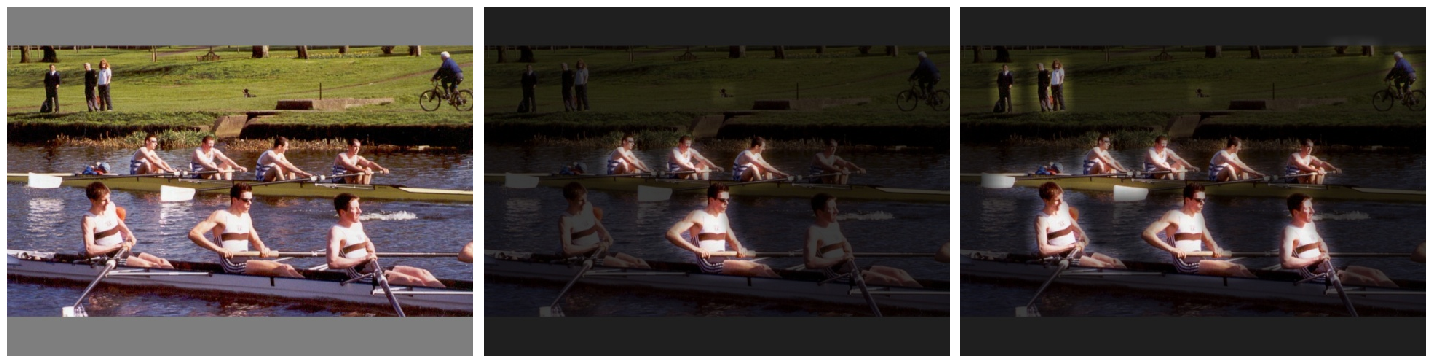

0: a man and a woman playing with a baseball bat
500: a woman and a woman standing in front of a child
5000: a woman is standing next to a child in a field


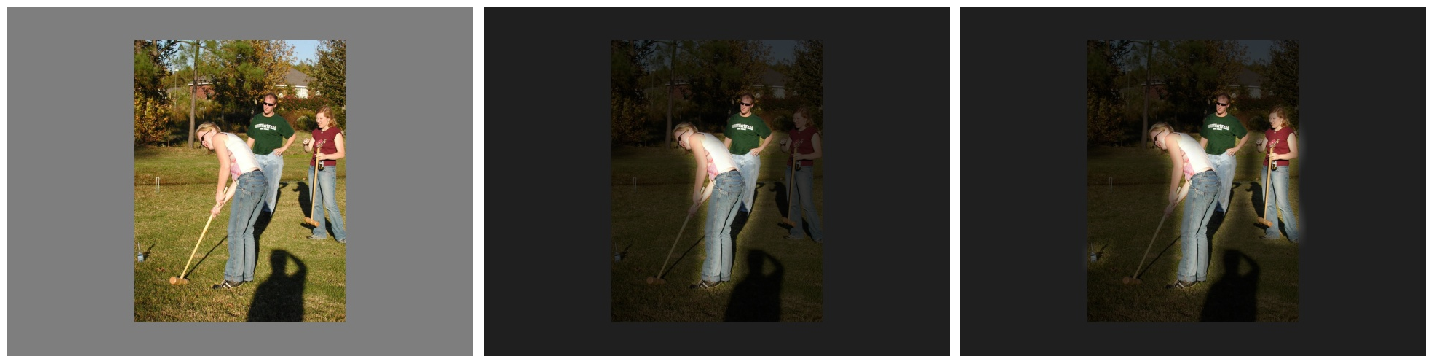

0: a woman standing in front of a bunch of oranges
500: a group of oranges sitting on a table
5000: a bunch of oranges sitting on a table


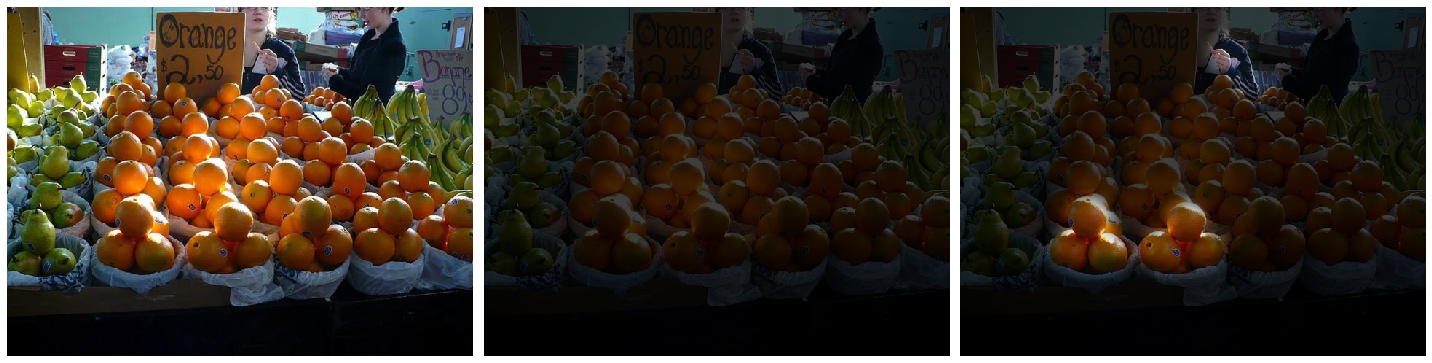

0: a dog is sitting in a boat in the rain
500: a group of people walking in the rain with umbrellas
5000: a group of people walking in the rain with a boat


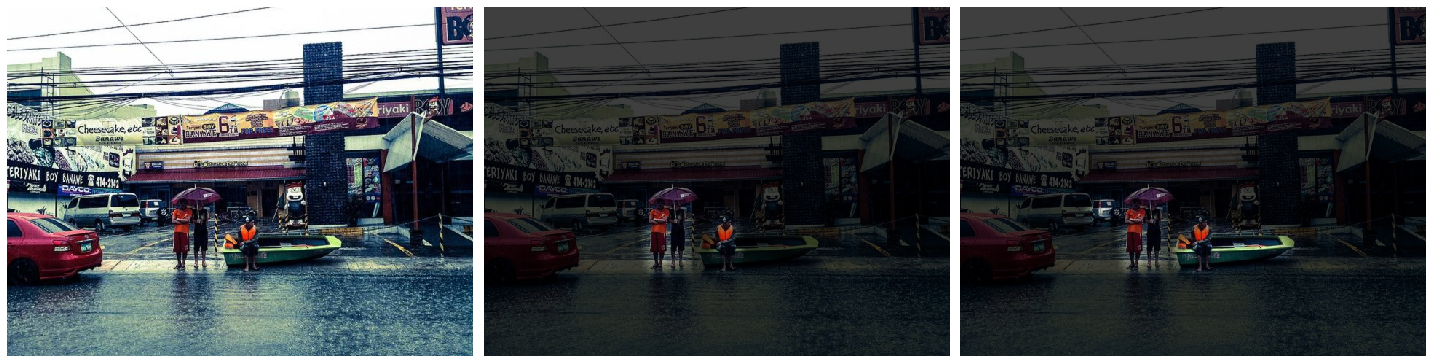

0: two men sitting at a table with a vase of flowers
500: two men in suits standing in front of a table with a
5000: two men in suits standing next to a table with flowers


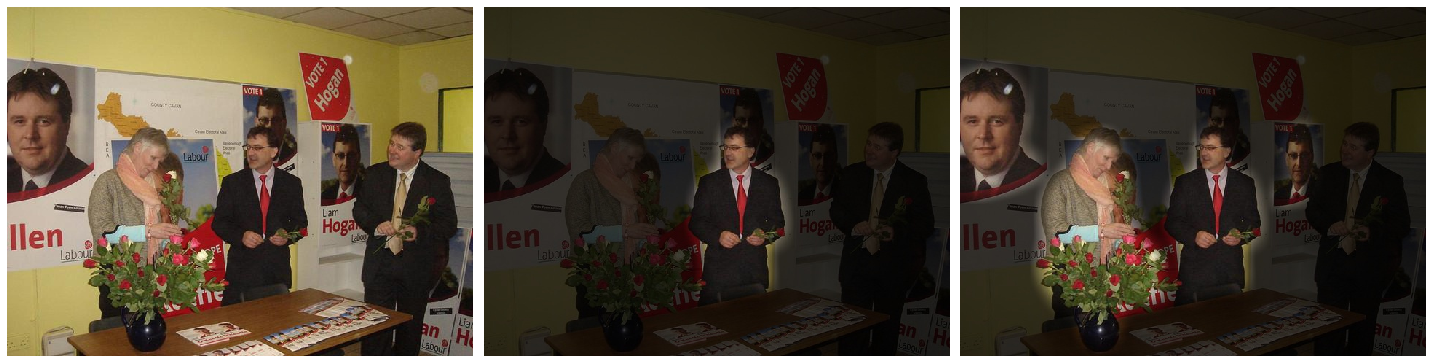

0: a cat laying on top of a desk in a living room
500: a living room with a couch and a table
5000: a desk with a computer sitting on top of it


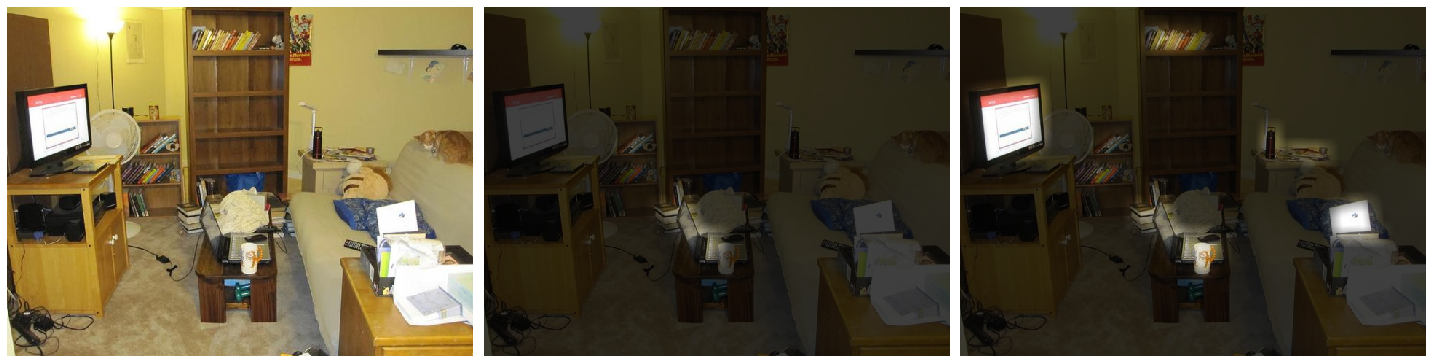

0: a group of people sitting on a bed with laptops
500: a woman sitting on a bed with a laptop
5000: a group of people sitting on a couch with laptops


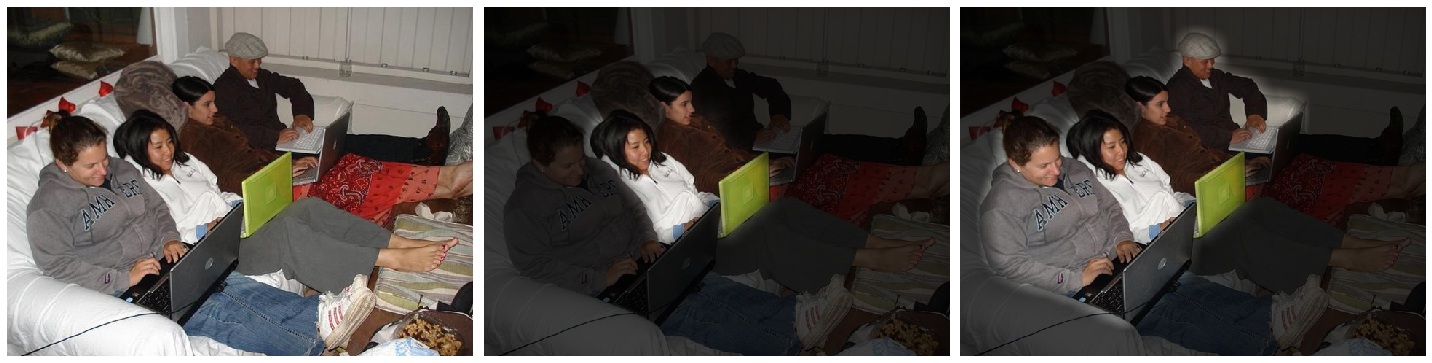

0: a group of people sitting at a table with a laptop
500: a woman sitting at a desk with a laptop computer
5000: a group of people sitting at a desk with a laptop computer


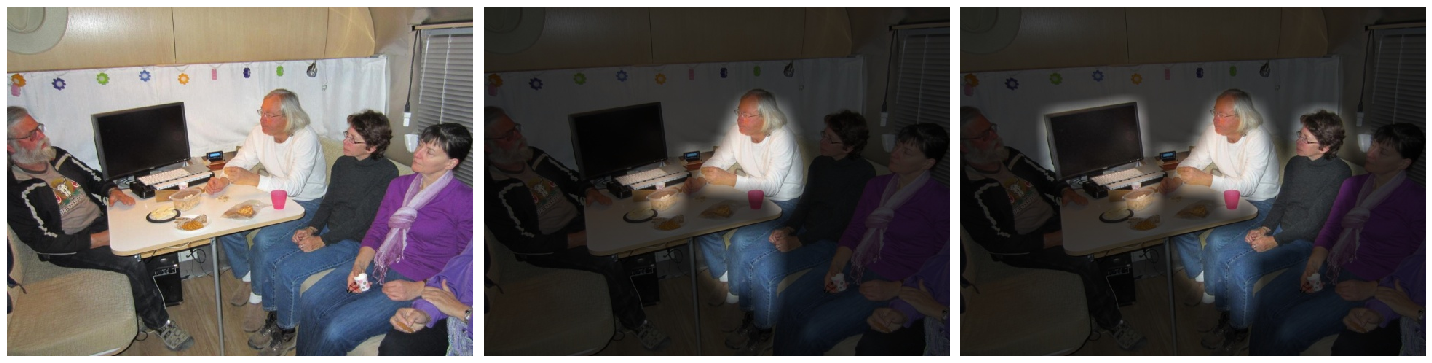

0: a red fire hydrant sitting on top of a street
500: a red car parked in front of a building
5000: a red car parked in front of a street


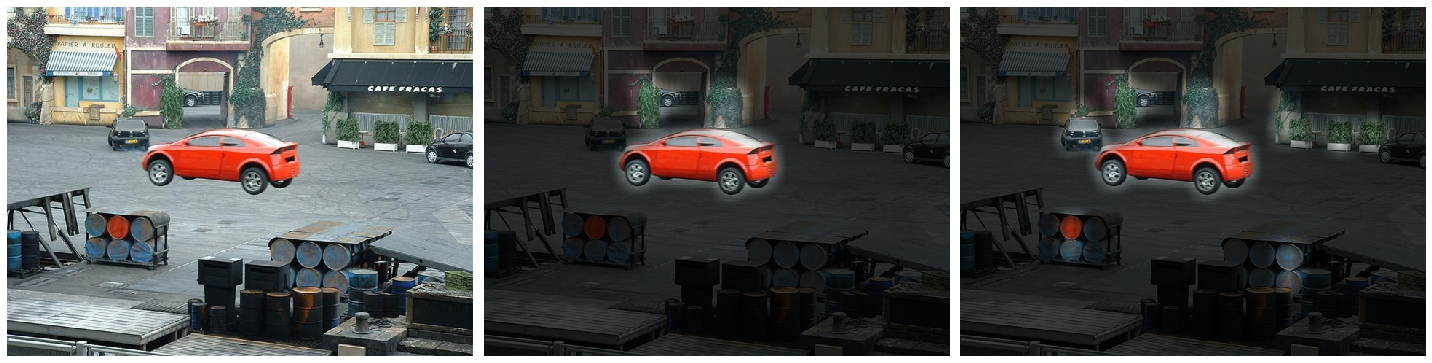

0: a couch sitting on the side of a street
500: a car parked on the side of a street
5000: a living room with a couch and a street


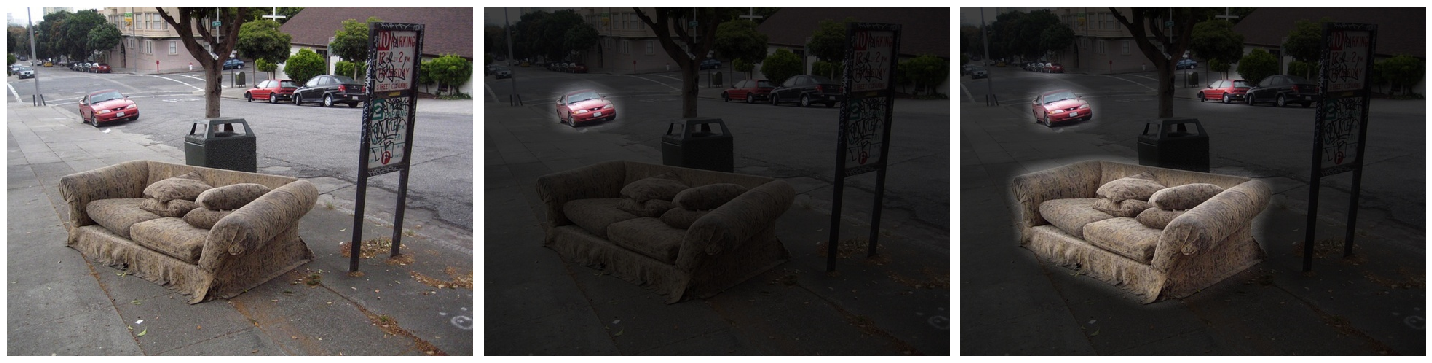

In [18]:
SHOW_IMG = True
SHOW_SUBSET = False
if (SHOW_SUBSET):
    img_sets = img_sets[:5]

for imname in img_sets:
    plt.clf()
    plt.cla()
    plt.close()
    fig,axes = plt.subplots(1,3,figsize=(20,6))
    axes = axes.flatten()
    for ax in axes:
        ax.axis('off')
    for i, time in enumerate(time_points):
        # anelise: image naming scheme?
        idx = img2idx["{}_{}".format(time,imname)]
        im_info = data[idx]
        imid = im_info['image_id']
        img = cv2.imread(img_path+"img{}.jpg".format(imid))
        if (DUMP_IMG):
            result_json[i].append({'filename':imname, 'caption': im_info['caption']})
            cv2.imwrite(os.path.join(caption_folder[i],imname), img)
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        #axes[i].set_title(im_info['caption'], fontname="Times New Roman")
        print("{}: {}".format(time, im_info['caption']))
    if DUMP_IMG: 
        fig.tight_layout()
        plt.savefig(os.path.join(dump_folder, "summary", imname))
    if (SHOW_IMG):
        fig.tight_layout()
        plt.show()

In [1]:
from PIL import Image
plt.imshow(Image.open("captions_results/summary/COCO_train2014_000000067155.jpg"))

NameError: name 'plt' is not defined